### TP1 Análisis exploratorio de datos Trocafone

In [3]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargo los datos y veo las primeras lineas
events = pd.read_csv('./data/events.csv.gz',compression='gzip',low_memory=False)
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Analizamos las dimensiones del dataframe
events.shape

(1011288, 23)

In [10]:
# Vemos que tipos tenemos en el df
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [11]:
# chequeamos que columnas tienen datos nulos y cuantos son
events.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
dtype: int64

In [22]:
events.describe(include='all')

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,84308,84308,84308,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,84308,84308,84308,84308,84308,84308,84308,84308,84308
unique,83545,1,25872,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,7,2,1836,28,1,4,272,120,334
top,2018-05-15 15:56:06,visited site,6b07be7b,nan,nan,nan,nan,nan,nan,nan,...,nan,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,3,84308,263,nan,nan,nan,nan,nan,nan,nan,...,nan,42723,58541,13373,24996,84308,42775,29006,18945,21864


Vemos que paises tenemos en el set de datos

In [54]:
events['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
France                   13
Netherlands              13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Italy                     7
Romania                   7
Russia                    6
Dominican Republic        6
Guadeloupe                6
Germany                   5
Paraguay                  4
Bangladesh                4
Colombia                  4
Switzerland               3
Morocco                   2
India                     2
Angola                    2
Israel                    1
China                     1
Mexico                    1
Venezuela                 1
Uzbekistan                1
Spain                     1
Belize                    1
Turkey                    1
Zimbabwe                  1
Philippines         

Si bien de los paises que tenemos, el que predomina es Brazil, tenemos 923910 datos que no tienen ningun pais asignado, por lo que no podemos descartarlos porque son una gran mayoria.

Analizamos las fechas que tenemos 

In [3]:
# Creamos una nueva columna con la fecha como datetime para poder manipular mejor los datos
events['datetime'] = pd.to_datetime(events['timestamp'])
events['datetime'].head()

0   2018-05-31 23:38:05
1   2018-05-31 23:38:05
2   2018-05-31 23:38:09
3   2018-05-31 23:38:40
4   2018-05-29 13:29:25
Name: datetime, dtype: datetime64[ns]

In [74]:
events['datetime'].dt.year.value_counts()

2018    1011288
Name: datetime, dtype: int64

In [75]:
events['datetime'].dt.month.value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: datetime, dtype: int64

Podemos ver que todos los datos que tenemos son de entre enero y mayo de 2018

Vemos cuales son los tipos de eventos que tenemos

In [76]:
events['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Text(0.5,1,'Cantidad de ocurrencias de cada evento')

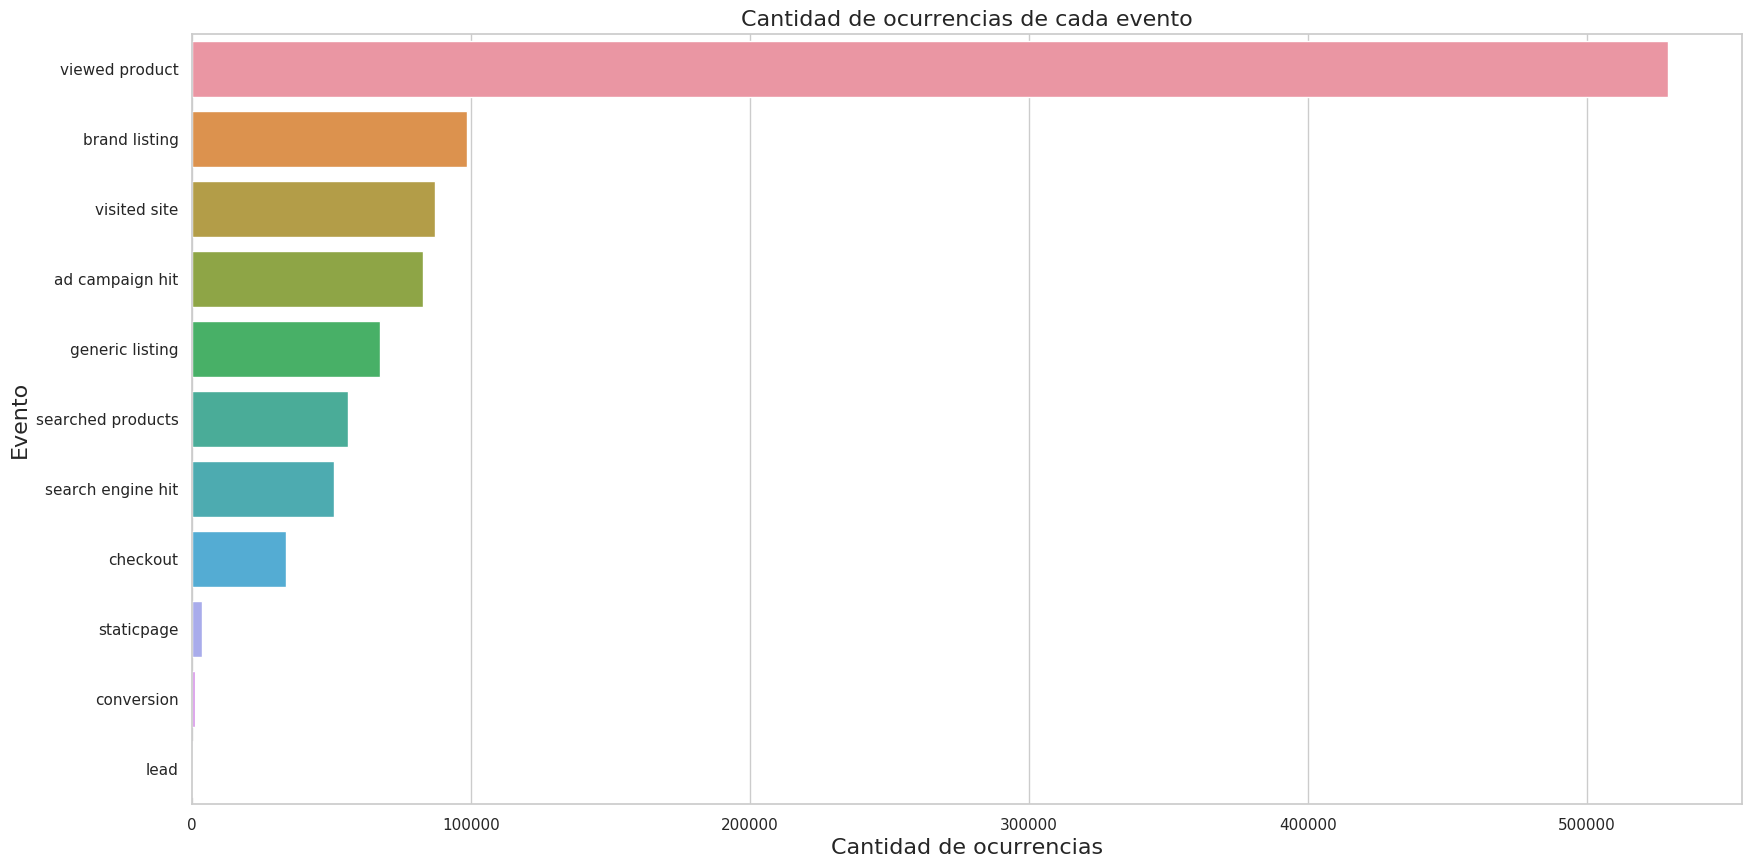

In [96]:
events_counts = events['event'].value_counts()
g = sns.barplot(x=events_counts.values, y=events_counts.index, orient='h')
g.set_xlabel("Cantidad de ocurrencias", fontsize=16)
g.set_ylabel("Evento", fontsize=16)
g.set_title("Cantidad de ocurrencias de cada evento", fontsize=16)

### Usuarios con mas eventos

In [5]:
events_by_users = events.groupby(['person', 'event'])['event'].agg('count').unstack()
events_by_users['number_of_events'] = events.groupby('person')['event'].count()
top_10_users = events_by_users.sort_values(ascending=False, by='number_of_events').head(10)
top_10_users.drop(['number_of_events'], inplace=True, axis=1)
top_10_users.head(10)


event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
person,,,,,,,,,,,
71492f2b,61.00,"1,149.00",3.00,nan,71.00,1.00,nan,15.00,4.00,"1,364.00",103.00
6b07be7b,59.00,780.00,13.00,6.00,424.00,nan,6.00,87.00,14.00,"1,118.00",263.00
285101a1,74.00,657.00,7.00,1.00,244.00,nan,12.00,7.00,nan,"1,077.00",61.00
3e34b3cf,4.00,36.00,10.00,nan,141.00,nan,nan,59.00,1.00,"1,487.00",139.00
2d5a84c1,61.00,50.00,3.00,nan,7.00,nan,6.00,6.00,nan,"1,525.00",142.00
5f25cb5d,53.00,542.00,3.00,2.00,281.00,1.00,37.00,14.00,32.00,681.00,151.00
5af7e2bc,220.00,627.00,4.00,2.00,2.00,1.00,2.00,23.00,7.00,728.00,157.00
3b5a5833,33.00,6.00,20.00,nan,67.00,2.00,25.00,nan,1.00,"1,383.00",168.00
d7e60792,7.00,28.00,1.00,nan,12.00,nan,8.00,1.00,3.00,"1,212.00",80.00


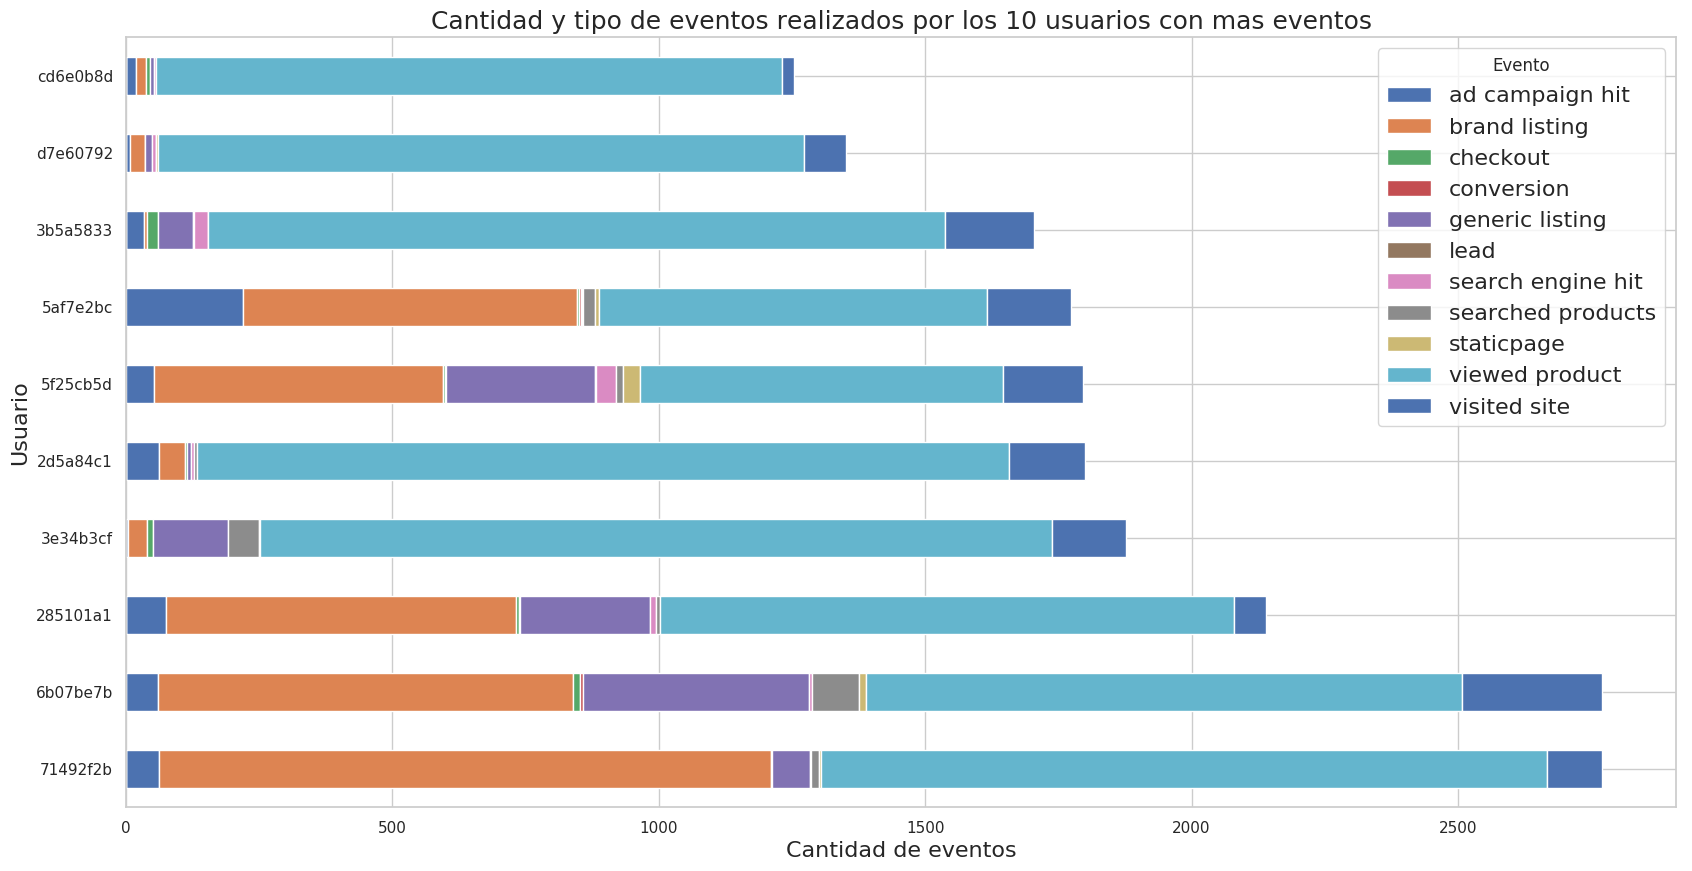

In [31]:
g = top_10_users.plot(kind='barh', stacked=True)
g.set_title('Cantidad y tipo de eventos realizados por los 10 usuarios con mas eventos', fontsize=18)
g.set_xlabel('Cantidad de eventos', fontsize=16)
g.set_ylabel('Usuario',fontsize=16)
g.legend(title='Evento', fontsize=16)

Relacion entre conversiones y hits de ads

Text(0.5,1,"Relación entre 'campaign hits' y conversiones")

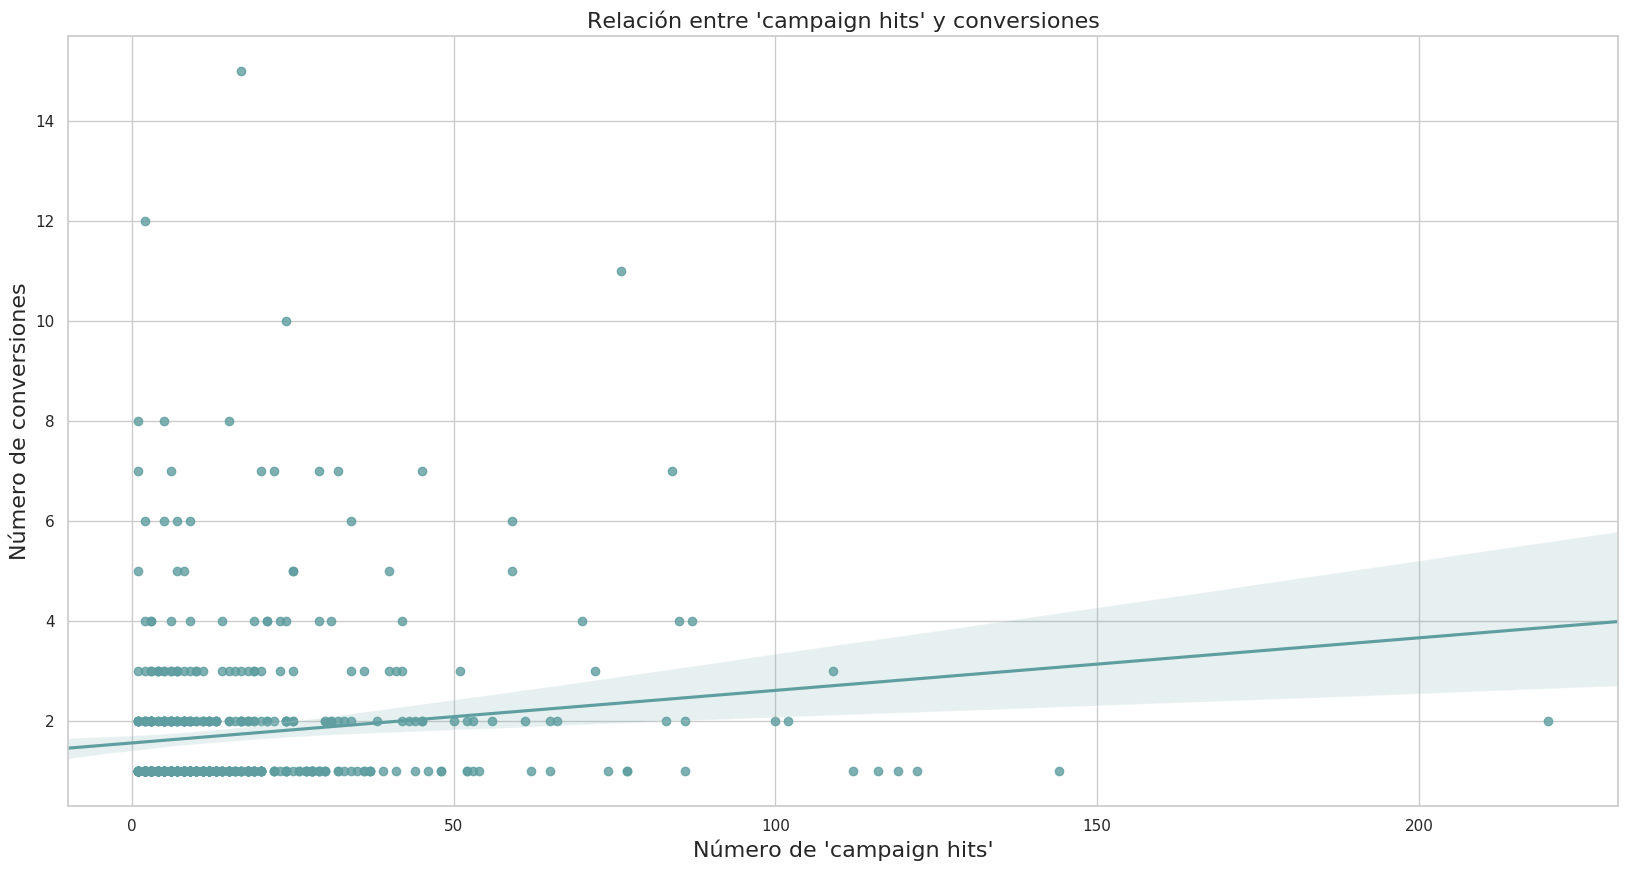

In [144]:
g = sns.regplot(x='ad campaign hit', y='conversion', data=events_by_users, color="cadetblue")
g.set_xlabel("Número de 'campaign hits'", fontsize=16)
g.set_ylabel("Número de conversiones", fontsize=16)
g.set_title("Relación entre 'campaign hits' y conversiones", fontsize=16)


Text(0.5,1,'Relación entre cantidad de visitas al sitio y conversiones')

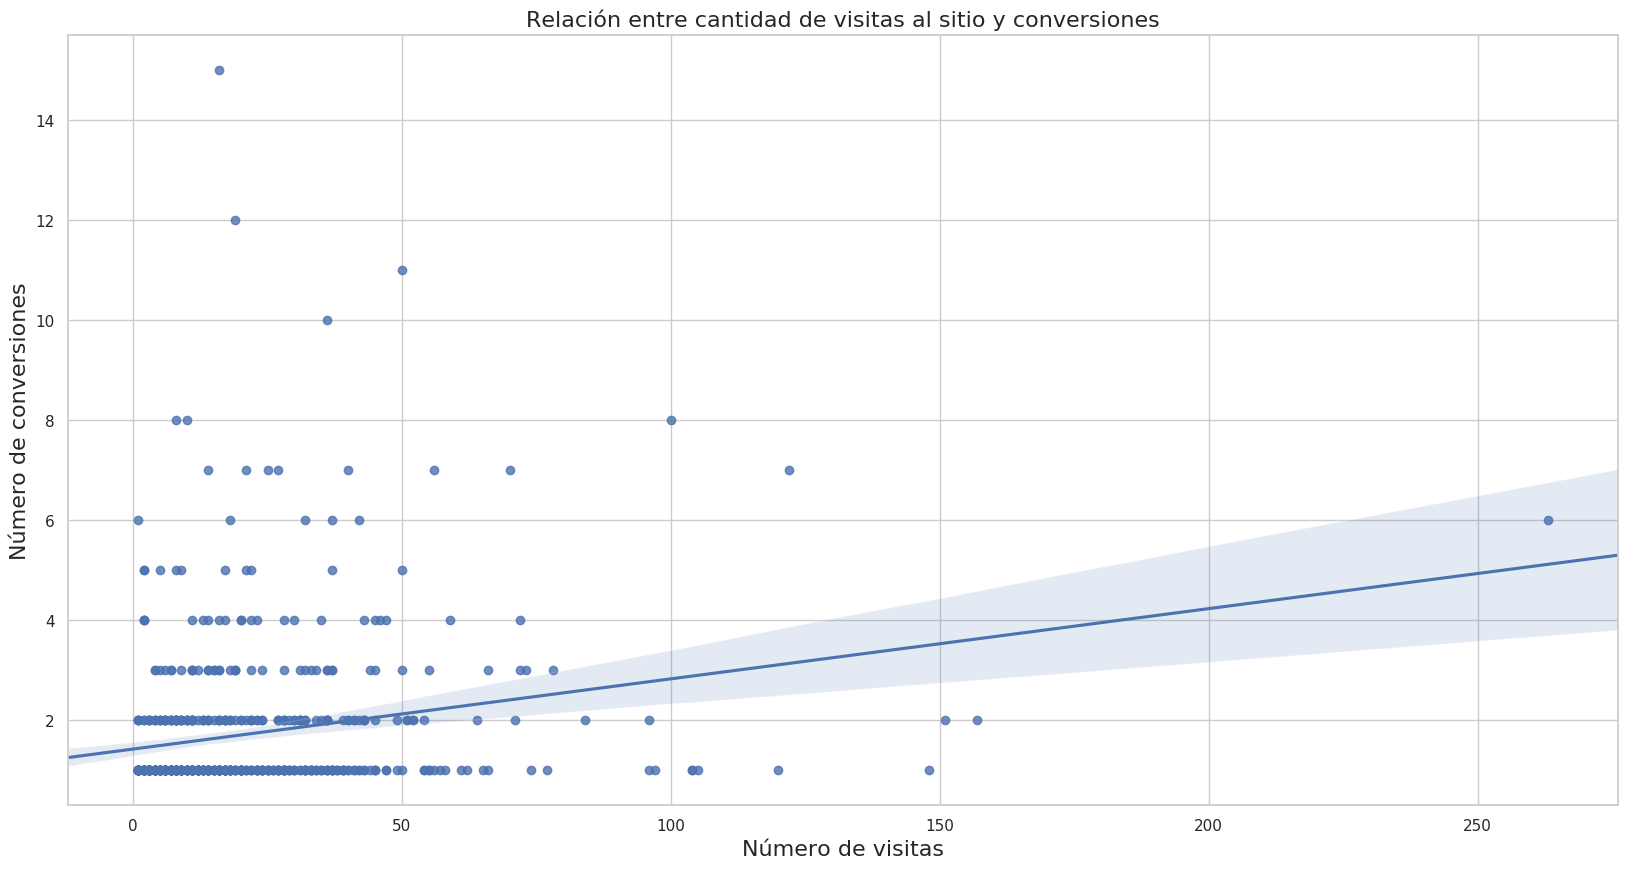

In [142]:
g = sns.regplot(x='visited site', y='conversion', data=events_by_users, color="b")
g.set_xlabel("Número de visitas", fontsize=16)
g.set_ylabel("Número de conversiones", fontsize=16)
g.set_title("Relación entre cantidad de visitas al sitio y conversiones", fontsize=16)


Text(0.5,1,'Relación entre numero de eventos del usuario y conversiones')

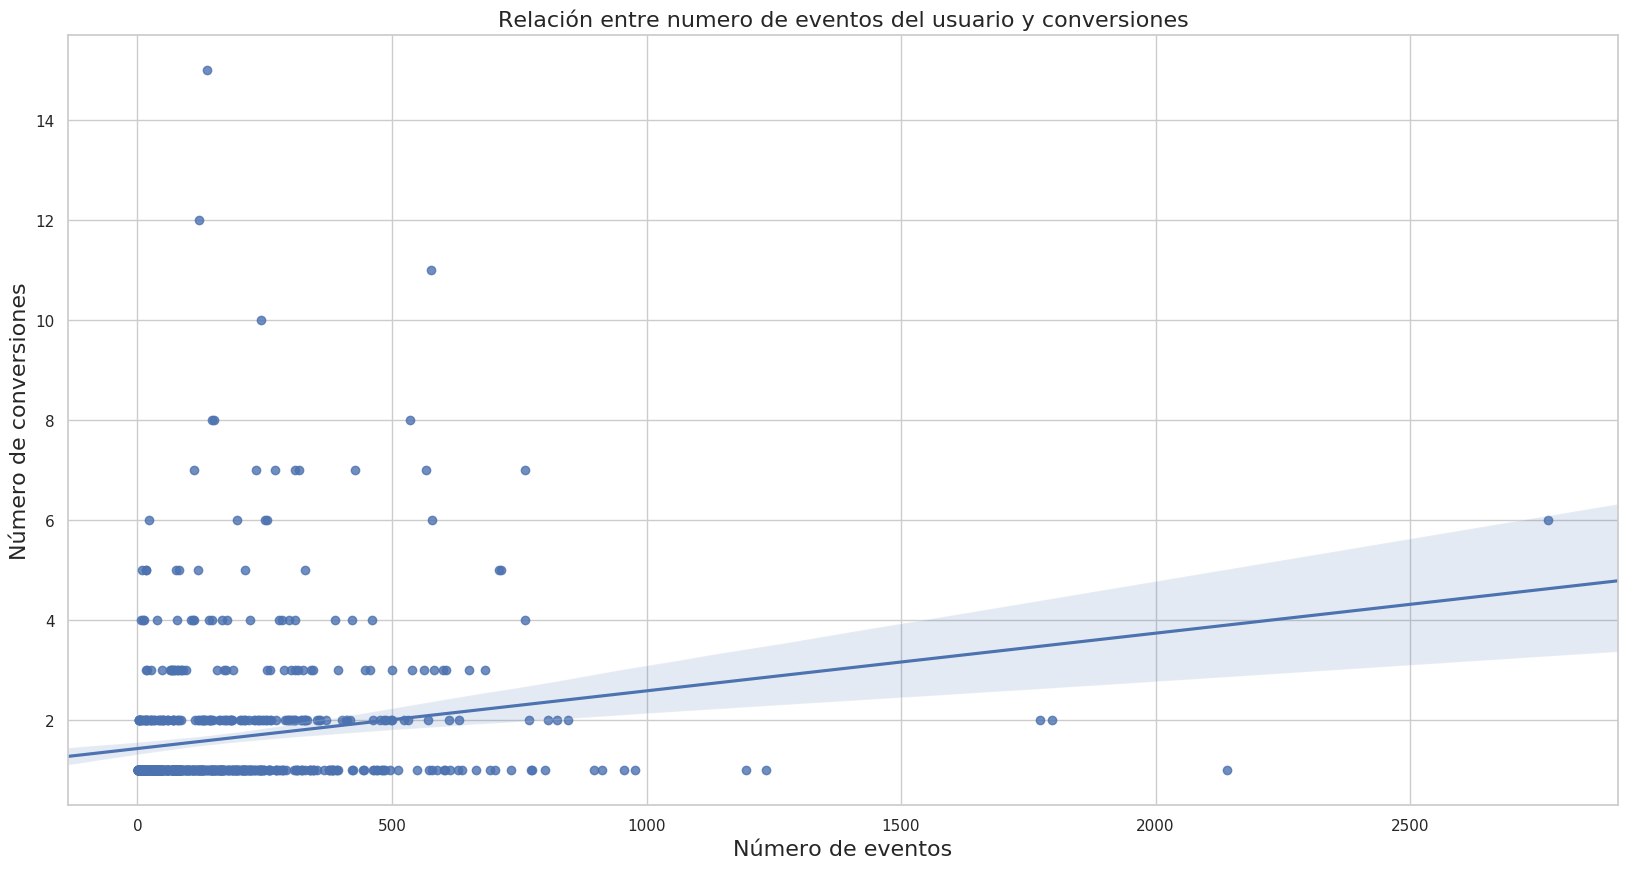

In [42]:
g = sns.regplot(x='number_of_events', y='conversion', data=events_by_users, color="b")
g.set_xlabel("Número de eventos", fontsize=16)
g.set_ylabel("Número de conversiones", fontsize=16)
g.set_title("Relación entre numero de eventos del usuario y conversiones", fontsize=16)

Text(0.5,1,'Relación entre hits de motores de busqueda y visitas al sitio')

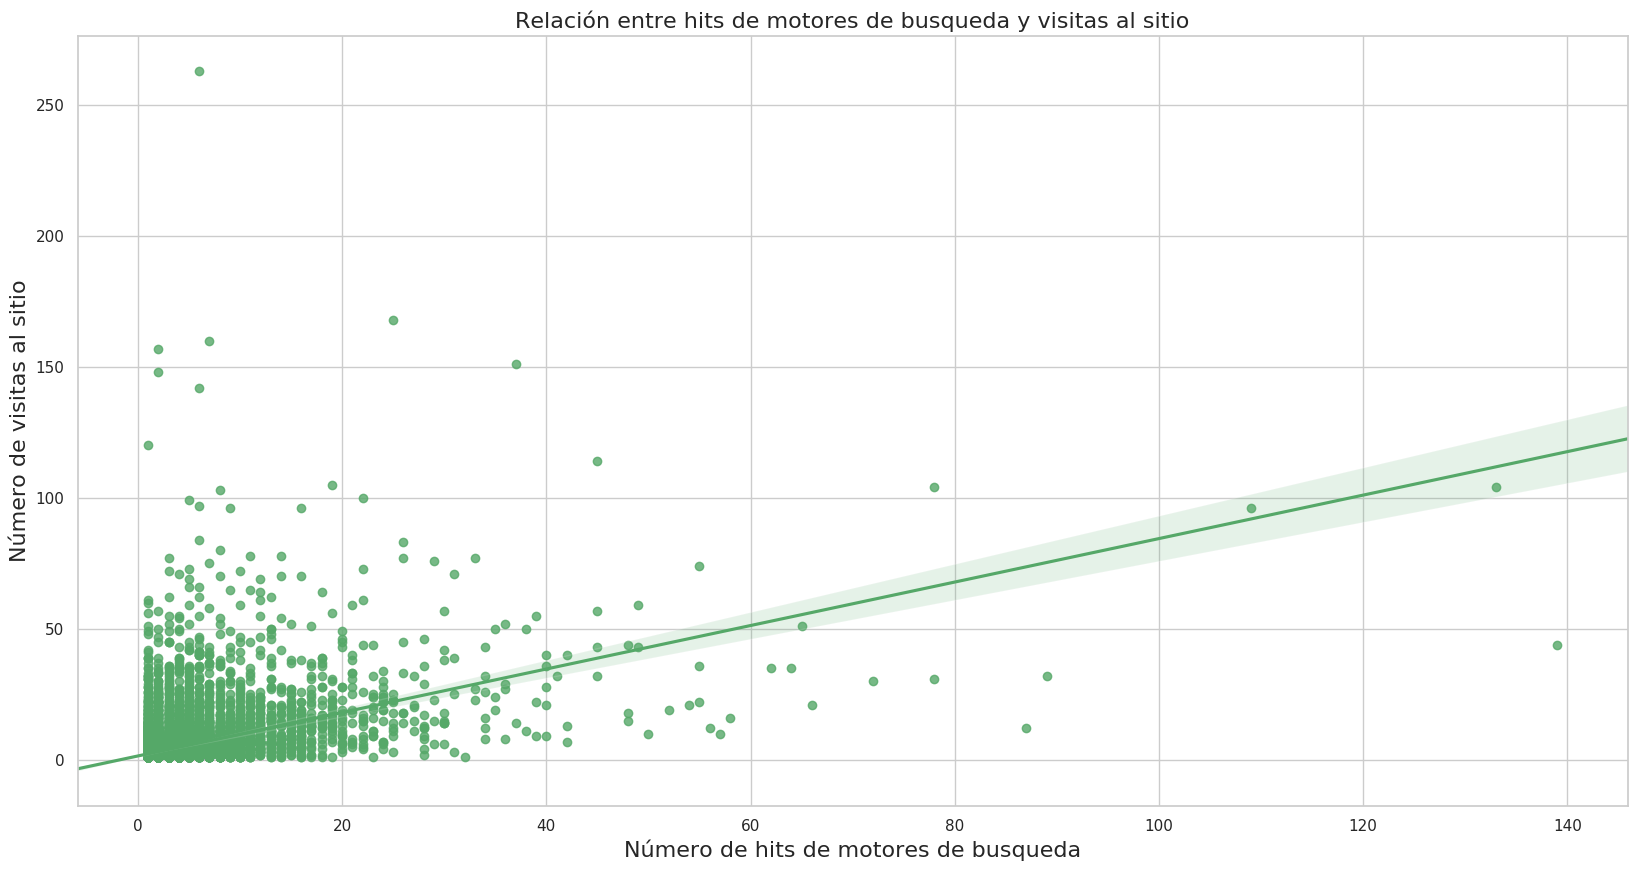

In [143]:
g = sns.regplot(x='search engine hit', y='visited site', data=events_by_users, color="g")
g.set_xlabel("Número de hits de motores de busqueda", fontsize=16)
g.set_ylabel("Número de visitas al sitio", fontsize=16)
g.set_title("Relación entre hits de motores de busqueda y visitas al sitio", fontsize=16)

In [81]:
events_by_sku = events.groupby(['sku','event'])['event'].agg('count').unstack()
events_by_sku.reset_index(inplace=True)
top_sku_by_conversion = events_by_sku.sort_values(ascending=False,by='conversion').head(10)


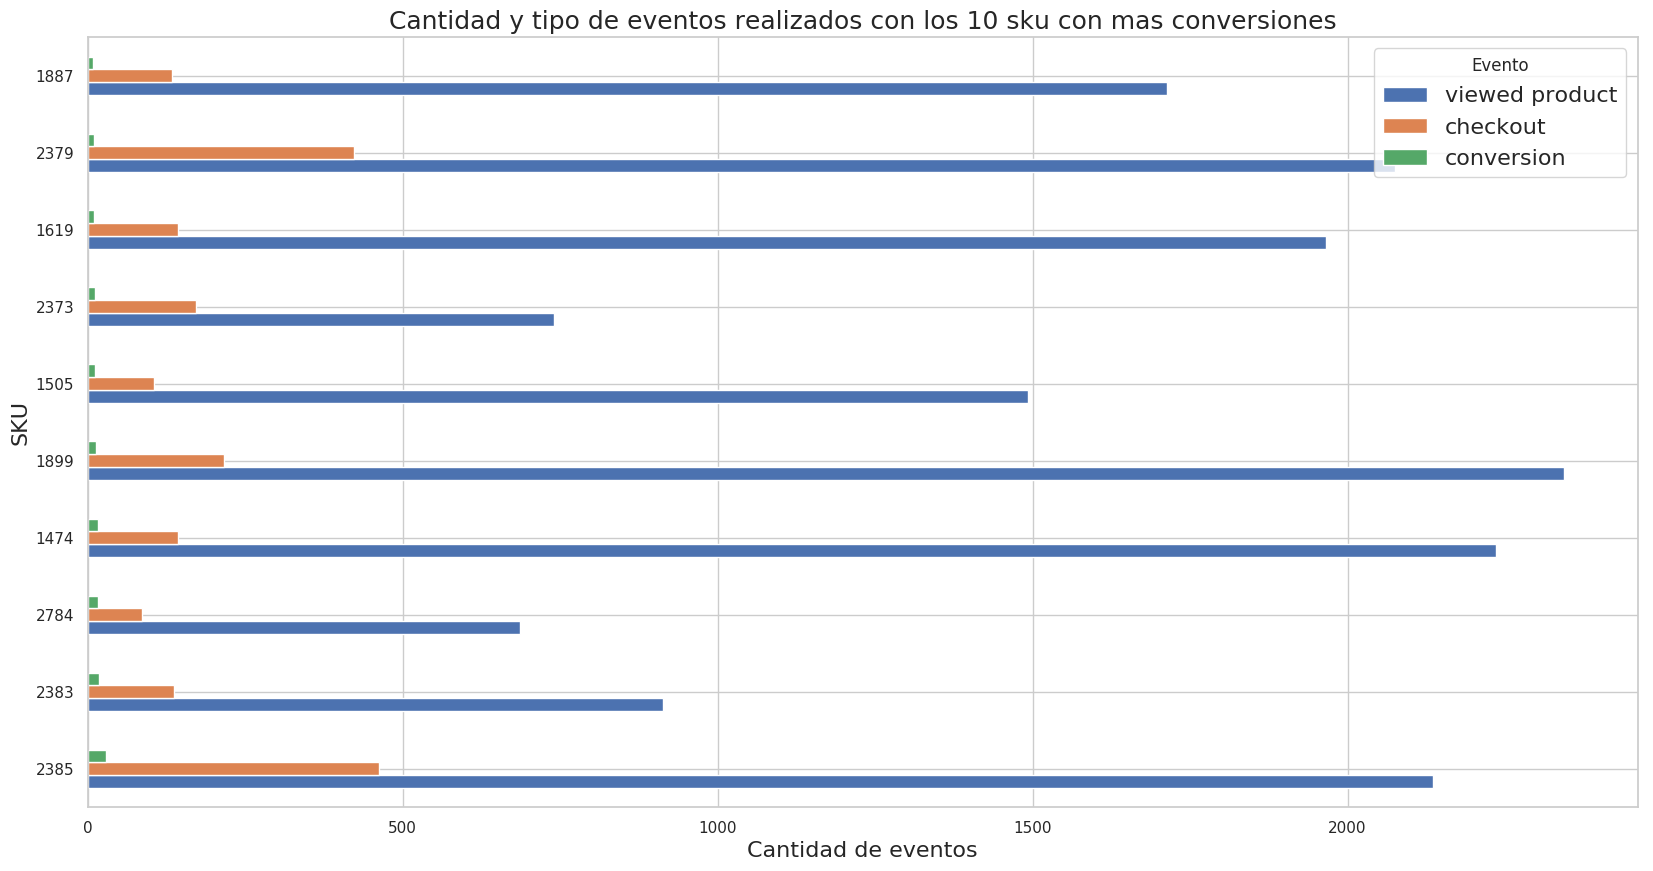

In [175]:
g = top_sku_by_conversion.plot(kind='barh')
g.set_title('Cantidad y tipo de eventos realizados con los 10 sku con mas conversiones', fontsize=18)
g.set_xlabel('Cantidad de eventos', fontsize=16)
g.set_ylabel('SKU',fontsize=16)
g.legend(title='Evento', fontsize=16)

Vemos la cantidad de conversiones por dia de la semana

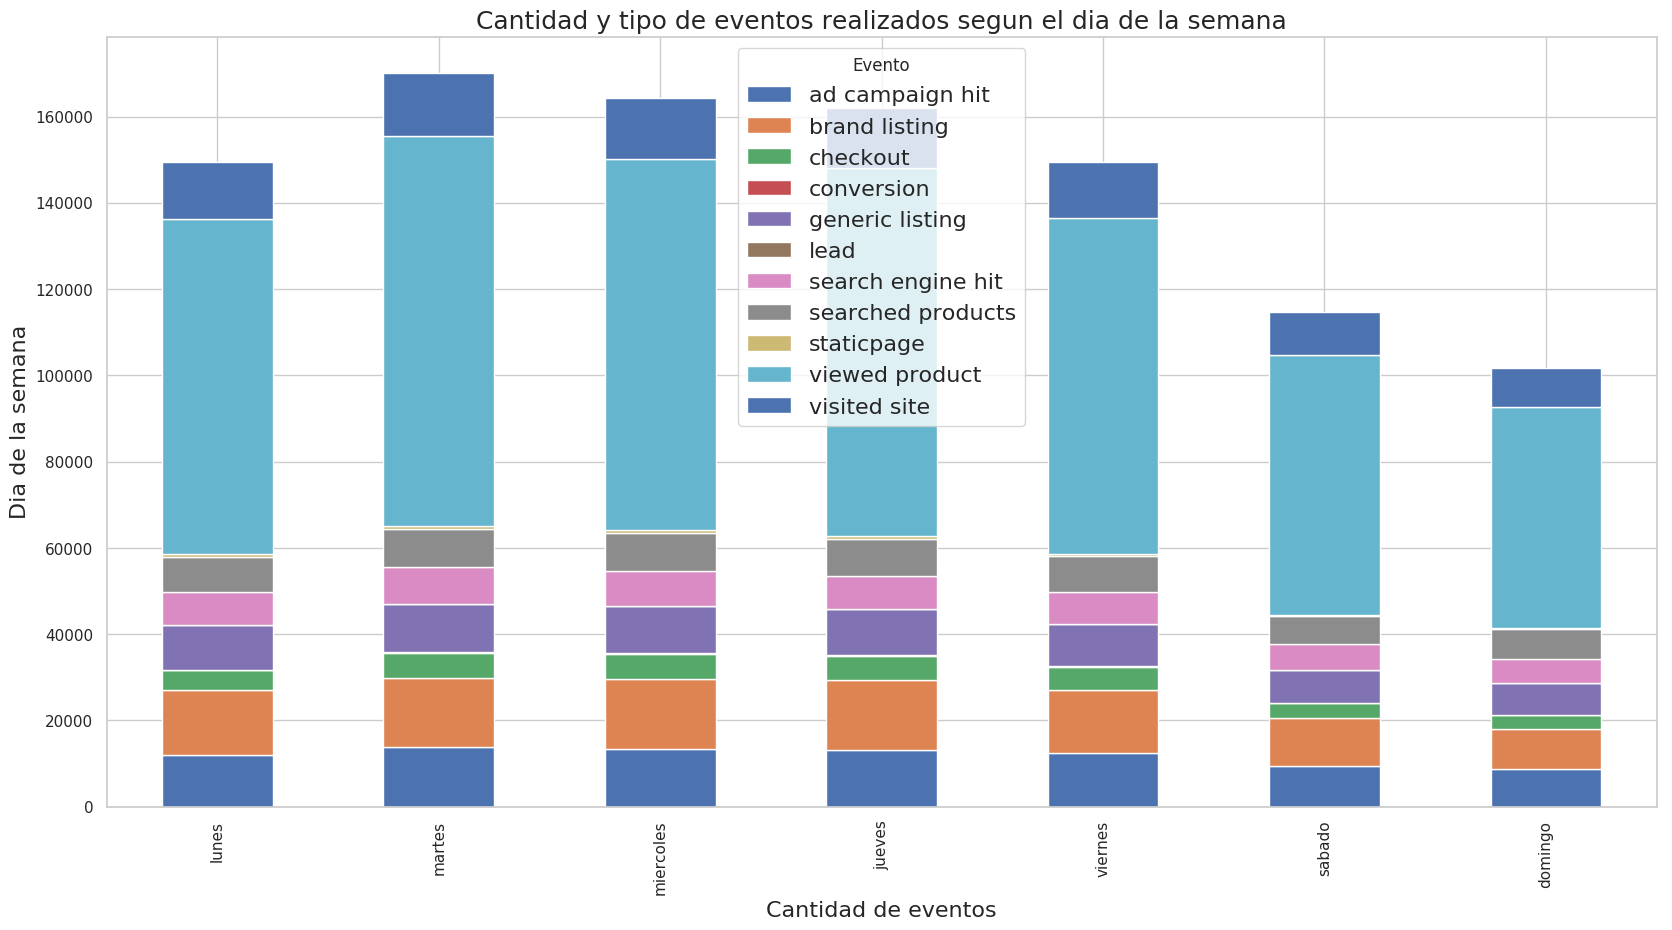

In [28]:
events['dayofweek'] = events['datetime'].dt.dayofweek
events_by_day = events.groupby(['dayofweek','event'])['event'].count().unstack()
events_by_day.index=['lunes','martes','miercoles','jueves','viernes','sabado','domingo']
g = events_by_day.plot(kind='bar', stacked=True)
g.set_title('Cantidad y tipo de eventos realizados segun el dia de la semana', fontsize=18)
g.set_xlabel('Cantidad de eventos', fontsize=16)
g.set_ylabel('Dia de la semana',fontsize=16)
g.legend(title='Evento', fontsize=16)


In [92]:
pd.merge(top_sku_by_conversion, events, on='sku', how='left').groupby(['person']).count()

,sku,viewed product,checkout,conversion,timestamp,event,url,model,condition,storage,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
person,,,,,,,,,,,,,,,,,,,,,
00204059,3,3,3,3,3,3,0,3,3,3,...,0,0,0,0,0,0,0,0,0,0
00344c0a,2,2,2,2,2,2,0,2,2,2,...,0,0,0,0,0,0,0,0,0,0
003857f6,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
003ff6cd,4,4,4,4,4,4,0,4,4,4,...,0,0,0,0,0,0,0,0,0,0
006aa565,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
006ed26c,4,4,4,4,4,4,0,4,4,4,...,0,0,0,0,0,0,0,0,0,0
0085ed67,2,2,2,2,2,2,0,2,2,2,...,0,0,0,0,0,0,0,0,0,0
00a61ab2,2,2,2,2,2,2,0,2,2,2,...,0,0,0,0,0,0,0,0,0,0
00a92c9b,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
